# Classification Estimator

In [1]:
import numpy as np
import pandas as pd

#vis lib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#sk lib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# preprocess the data - create scaler...
# scale the data
from sklearn.preprocessing import MinMaxScaler
# estimator, model, classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

## Prepare Data
* Perform EDA
* Handle Missing Data (Remove or Impute)
* Identify Target Data
* Scale the Data
* Encode any Text Data (Categorical Data)

In [2]:
data = pd.read_csv("./penguins_size.csv")

In [3]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.shape

(344, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
data["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
data["species"].value_counts(normalize=True)

species
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: proportion, dtype: float64

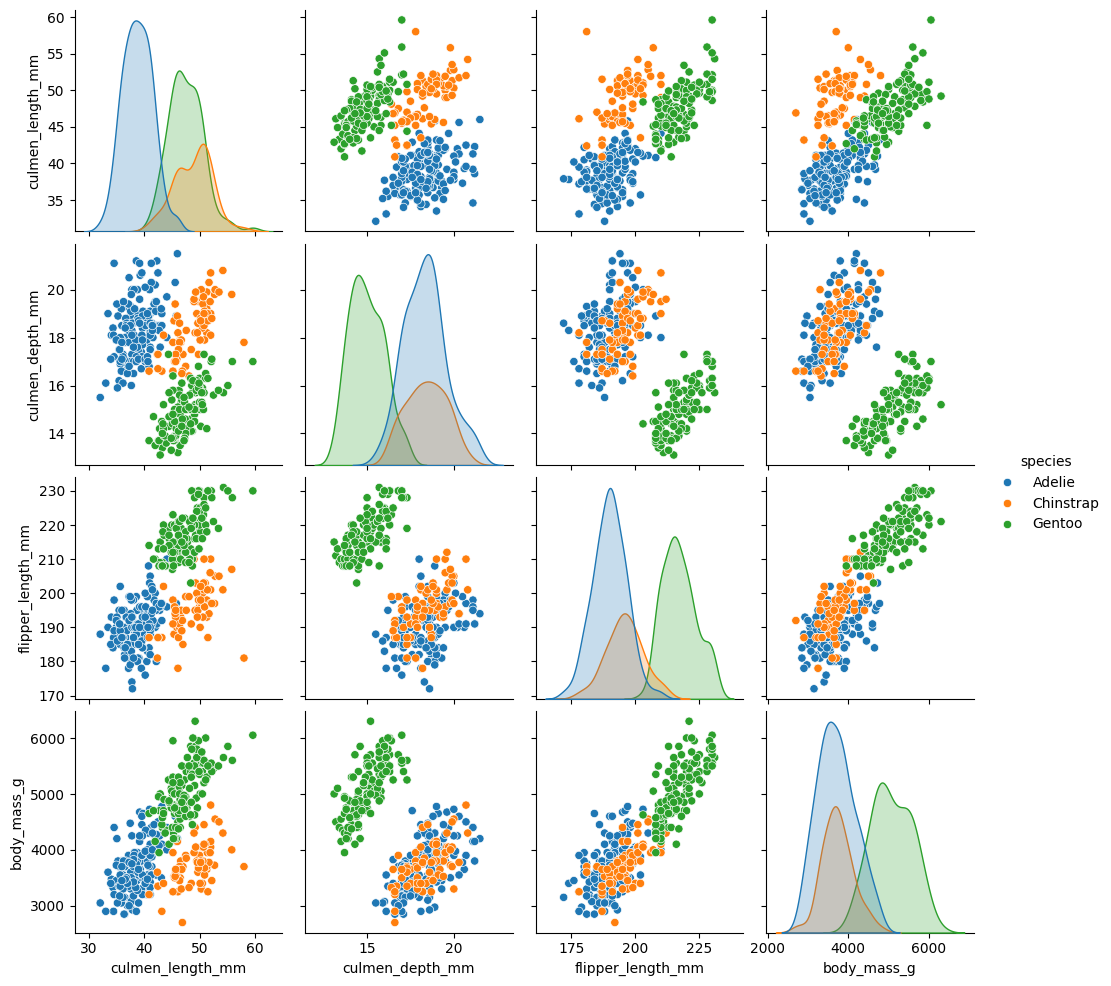

In [8]:
sns.pairplot(data, hue="species")
plt.show()

### Handle Missing Data

In [9]:
data.isnull().sum()


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
# clean the data
data.dropna(inplace=True)
data.shape

(334, 7)

In [11]:
data = data[data['sex'] != '.']
data.shape

(333, 7)

In [12]:
# copy the clean data to a working df - No more cleaning of data at this point
df = data.copy()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [13]:
# you can also export the clean data to csv
# data.to_csv('./clean_penguins_size.csv', index=False)

In [14]:
# reset the index of the remaining dataframe
df.reset_index(drop=True, inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [15]:
df["species"].value_counts(normalize=True)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64

In [16]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [17]:
# perform any renames..
df.columns = ["species", "island", "bill_length", "bill_depth", "flipper_length", 'body_mass_g', "gender"]

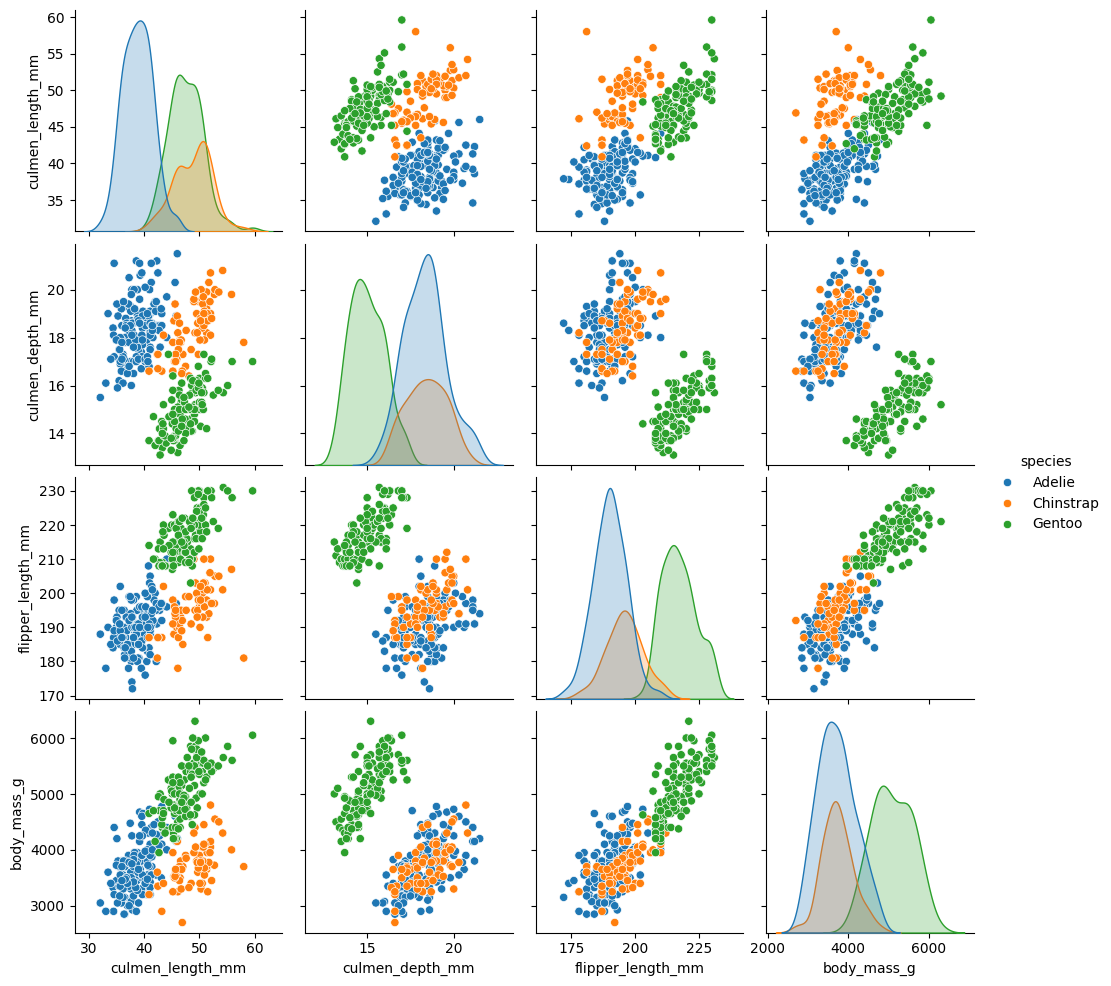

In [18]:
sns.pairplot(data, hue="species")

### Scale the Data

In [19]:
# prep data for scaling and encoding
df.dtypes

species            object
island             object
bill_length       float64
bill_depth        float64
flipper_length    float64
body_mass_g       float64
gender             object
dtype: object

In [20]:
df_text = df.select_dtypes(include = ['object'])
df_numeric = df.select_dtypes(exclude = ['object'])

In [21]:
df_numeric.head(3)

,bill_length,bill_depth,flipper_length,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0


In [22]:
df_text.head(3)

,species,island,gender
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE


In [23]:
# preprocess the data - create scaler...
scaler = MinMaxScaler()

scaled_numeric = scaler.fit_transform(df_numeric)
scaled_numeric

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [24]:
df_scaled_numeric = pd.DataFrame(scaled_numeric)
df_scaled_numeric.columns = df_numeric.columns
df_scaled_numeric

,bill_length,bill_depth,flipper_length,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.167273,0.738095,0.355932,0.208333
4,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056
329,0.534545,0.142857,0.728814,0.597222
330,0.665455,0.309524,0.847458,0.847222
331,0.476364,0.202381,0.677966,0.694444


#### Encode the Data

In [25]:
# encode any text features that will be features (you do not encode Target / Label / y)
target = df_text['species']
df_text.drop(['species'], axis=1, inplace=True)

In [26]:
df_text

,island,gender
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
3,Torgersen,FEMALE
4,Torgersen,MALE
...,...,...
328,Biscoe,FEMALE
329,Biscoe,FEMALE
330,Biscoe,MALE
331,Biscoe,FEMALE


In [27]:
# use the dummies function to get a column or field for each unique rows and record
df_scaled_text = pd.get_dummies(df_text, drop_first=True)

In [28]:
df_scaled_text

,island_Dream,island_Torgersen,gender_MALE
0,False,True,True
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,True
...,...,...,...
328,False,False,False
329,False,False,False
330,False,False,True
331,False,False,False


In [29]:
df_final = pd.concat([df_scaled_text, df_scaled_numeric], axis=1)
df_final

,island_Dream,island_Torgersen,gender_MALE,bill_length,bill_depth,flipper_length,body_mass_g
0,False,True,True,0.254545,0.666667,0.152542,0.291667
1,False,True,False,0.269091,0.511905,0.237288,0.305556
2,False,True,False,0.298182,0.583333,0.389831,0.152778
3,False,True,False,0.167273,0.738095,0.355932,0.208333
4,False,True,True,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...,...,...,...
328,False,False,False,0.549091,0.071429,0.711864,0.618056
329,False,False,False,0.534545,0.142857,0.728814,0.597222
330,False,False,True,0.665455,0.309524,0.847458,0.847222
331,False,False,False,0.476364,0.202381,0.677966,0.694444


In [30]:
# df_final.to_csv('./scaled_clean_penguins.csv')

## Select the Target Data
* Create an array of the target data
* Select the features to be used for prediction
* Create a 2d array (or DF) of the selected features for the X Matrix

In [31]:
y = target
y.shape, y.dtype

((333,), dtype('O'))

In [32]:
y.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [33]:
X = df_final
X.head()

,island_Dream,island_Torgersen,gender_MALE,bill_length,bill_depth,flipper_length,body_mass_g
0,False,True,True,0.254545,0.666667,0.152542,0.291667
1,False,True,False,0.269091,0.511905,0.237288,0.305556
2,False,True,False,0.298182,0.583333,0.389831,0.152778
3,False,True,False,0.167273,0.738095,0.355932,0.208333
4,False,True,True,0.261818,0.892857,0.305085,0.263889


## Prepare the Model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [35]:
X_train[0:5]

,island_Dream,island_Torgersen,gender_MALE,bill_length,bill_depth,flipper_length,body_mass_g
39,True,False,False,0.178182,0.452381,0.220339,0.083333
310,False,False,False,0.592727,0.154762,0.525424,0.534722
104,False,False,False,0.218182,0.404762,0.440678,0.312500
155,True,False,True,0.698182,0.809524,0.440678,0.277778
193,True,False,True,0.614545,0.773810,0.677966,0.444444


In [36]:
X_test.head()

,island_Dream,island_Torgersen,gender_MALE,bill_length,bill_depth,flipper_length,body_mass_g
25,True,False,False,0.269091,0.428571,0.101695,0.152778
309,False,False,False,0.538182,0.178571,0.847458,0.604167
73,False,True,True,0.363636,0.714286,0.389831,0.361111
195,True,False,False,0.643636,0.500000,0.440678,0.270833
57,False,False,True,0.327273,0.607143,0.338983,0.375000


In [37]:
y_train.head()

39        Adelie
310       Gentoo
104       Adelie
155    Chinstrap
193    Chinstrap
Name: species, dtype: object

In [38]:
y_test.head()

25        Adelie
309       Gentoo
73        Adelie
195    Chinstrap
57        Adelie
Name: species, dtype: object

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((223, 7), (110, 7), (223,), (110,))

## Create the Model

In [40]:
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()
lgr = LogisticRegression()

In [41]:
lda.fit(X_train, y_train)
knn.fit(X_train, y_train)
lgr.fit(X_train, y_train)

LogisticRegression()

In [42]:
lda_preds_train = lda.predict(X_train)
knn_preds_train = knn.predict(X_train)

In [43]:
lda.score(X_train, y_train), knn.score(X_train, y_train)

(0.9955156950672646, 0.9955156950672646)

In [44]:
lda_cm = confusion_matrix(lda_preds_train, y_train)
lda_cm

array([[93,  0,  0],
       [ 1, 48,  0],
       [ 0,  0, 81]], dtype=int64)

In [45]:
knn_cm = confusion_matrix(knn_preds_train, y_train)
knn_cm

array([[93,  0,  0],
       [ 1, 48,  0],
       [ 0,  0, 81]], dtype=int64)

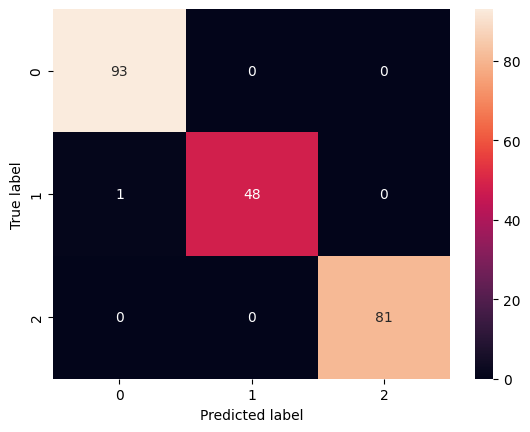

In [46]:
# Assuming cm is your confusion matrix
sns.heatmap(knn_cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [47]:
df_train = X_train
df_train['prediction'], df_train['actual'] = knn_preds_train, y_train  # or place in lda_preds
df_train

,island_Dream,island_Torgersen,gender_MALE,bill_length,bill_depth,flipper_length,body_mass_g,prediction,actual
39,True,False,False,0.178182,0.452381,0.220339,0.083333,Adelie,Adelie
310,False,False,False,0.592727,0.154762,0.525424,0.534722,Gentoo,Gentoo
104,False,False,False,0.218182,0.404762,0.440678,0.312500,Adelie,Adelie
155,True,False,True,0.698182,0.809524,0.440678,0.277778,Chinstrap,Chinstrap
193,True,False,True,0.614545,0.773810,0.677966,0.444444,Chinstrap,Chinstrap
...,...,...,...,...,...,...,...,...,...
188,True,False,True,0.683636,0.714286,0.406780,0.236111,Chinstrap,Chinstrap
71,False,True,True,0.185455,0.750000,0.203390,0.333333,Adelie,Adelie
106,False,False,False,0.276364,0.547619,0.355932,0.138889,Adelie,Adelie
270,False,False,True,0.487273,0.226190,0.813559,0.638889,Gentoo,Gentoo


In [50]:
# mislabeled in train...
df_train[df_train['prediction'] != df_train['actual']]

,island_Dream,island_Torgersen,gender_MALE,bill_length,bill_depth,flipper_length,body_mass_g,prediction,actual
32,True,False,False,0.367273,0.642857,0.135593,0.236111,Chinstrap,Adelie


In [51]:
df_train.loc[32, 'actual'] = 'Misclassified Bird'

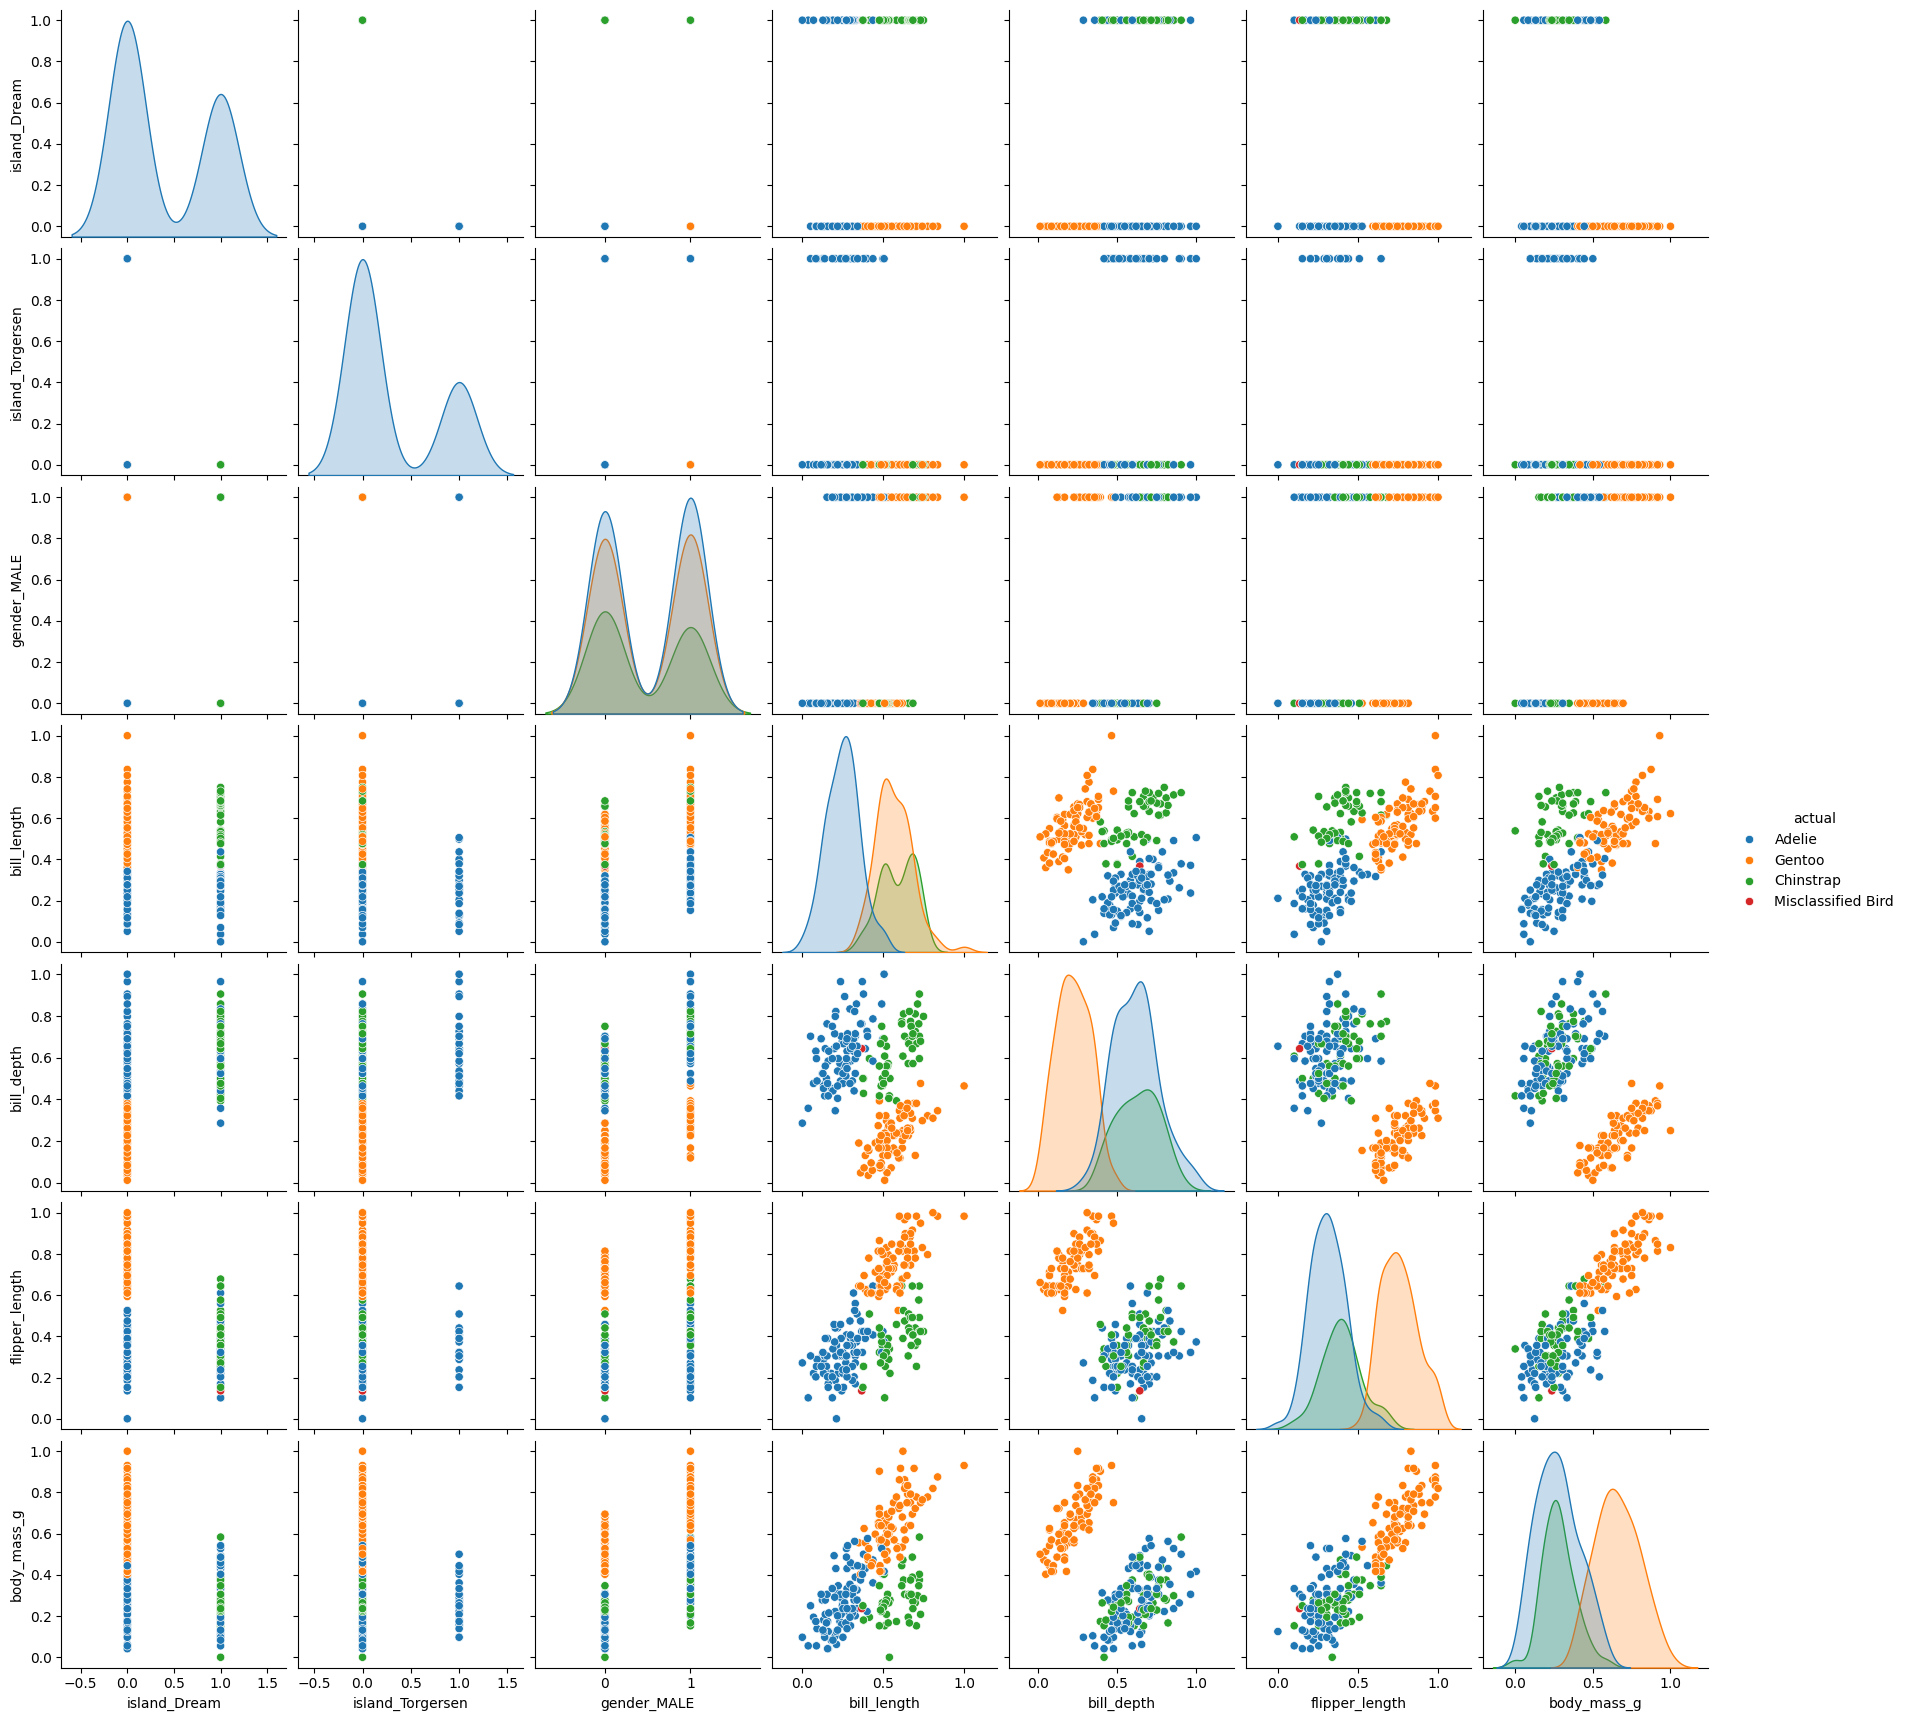

In [52]:
sns.pairplot(df_train, hue='actual');

In [53]:
preds_test = knn.predict(X_test)

In [54]:
y_test[0:5]

25        Adelie
309       Gentoo
73        Adelie
195    Chinstrap
57        Adelie
Name: species, dtype: object

In [55]:
knn.score(X_test, y_test)

0.9818181818181818

In [57]:
X_test['Prediction'] = preds_test
X_test['Actual'] = y_test

In [58]:
X_test

,island_Dream,island_Torgersen,gender_MALE,bill_length,bill_depth,flipper_length,body_mass_g,Prediction,Actual
25,True,False,False,0.269091,0.428571,0.101695,0.152778,Chinstrap,Adelie
309,False,False,False,0.538182,0.178571,0.847458,0.604167,Gentoo,Gentoo
73,False,True,True,0.363636,0.714286,0.389831,0.361111,Adelie,Adelie
195,True,False,False,0.643636,0.500000,0.440678,0.270833,Chinstrap,Chinstrap
57,False,False,True,0.327273,0.607143,0.338983,0.375000,Adelie,Adelie
...,...,...,...,...,...,...,...,...,...
10,False,True,False,0.163636,0.559524,0.220339,0.277778,Adelie,Adelie
225,False,False,True,0.614545,0.357143,0.745763,0.791667,Gentoo,Gentoo
227,False,False,True,0.592727,0.178571,0.694915,0.875000,Gentoo,Gentoo
81,True,False,False,0.174545,0.654762,0.288136,0.222222,Adelie,Adelie


In [59]:
cm = confusion_matrix(y_test, preds_test)
cm

array([[51,  1,  0],
       [ 1, 19,  0],
       [ 0,  0, 38]], dtype=int64)

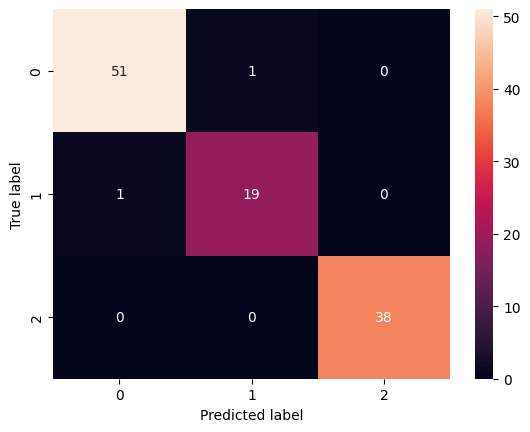

In [60]:
# Assuming cm is your confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [61]:
# mislabeled in test...
X_test[X_test['Prediction'] != X_test['Actual']]

,island_Dream,island_Torgersen,gender_MALE,bill_length,bill_depth,flipper_length,body_mass_g,Prediction,Actual
25,True,False,False,0.269091,0.428571,0.101695,0.152778,Chinstrap,Adelie
176,True,False,False,0.320000,0.416667,0.254237,0.138889,Adelie,Chinstrap


In [62]:
X_test.loc[[25], 'Actual'] = '25'
X_test.loc[[176], 'Actual'] = '176'

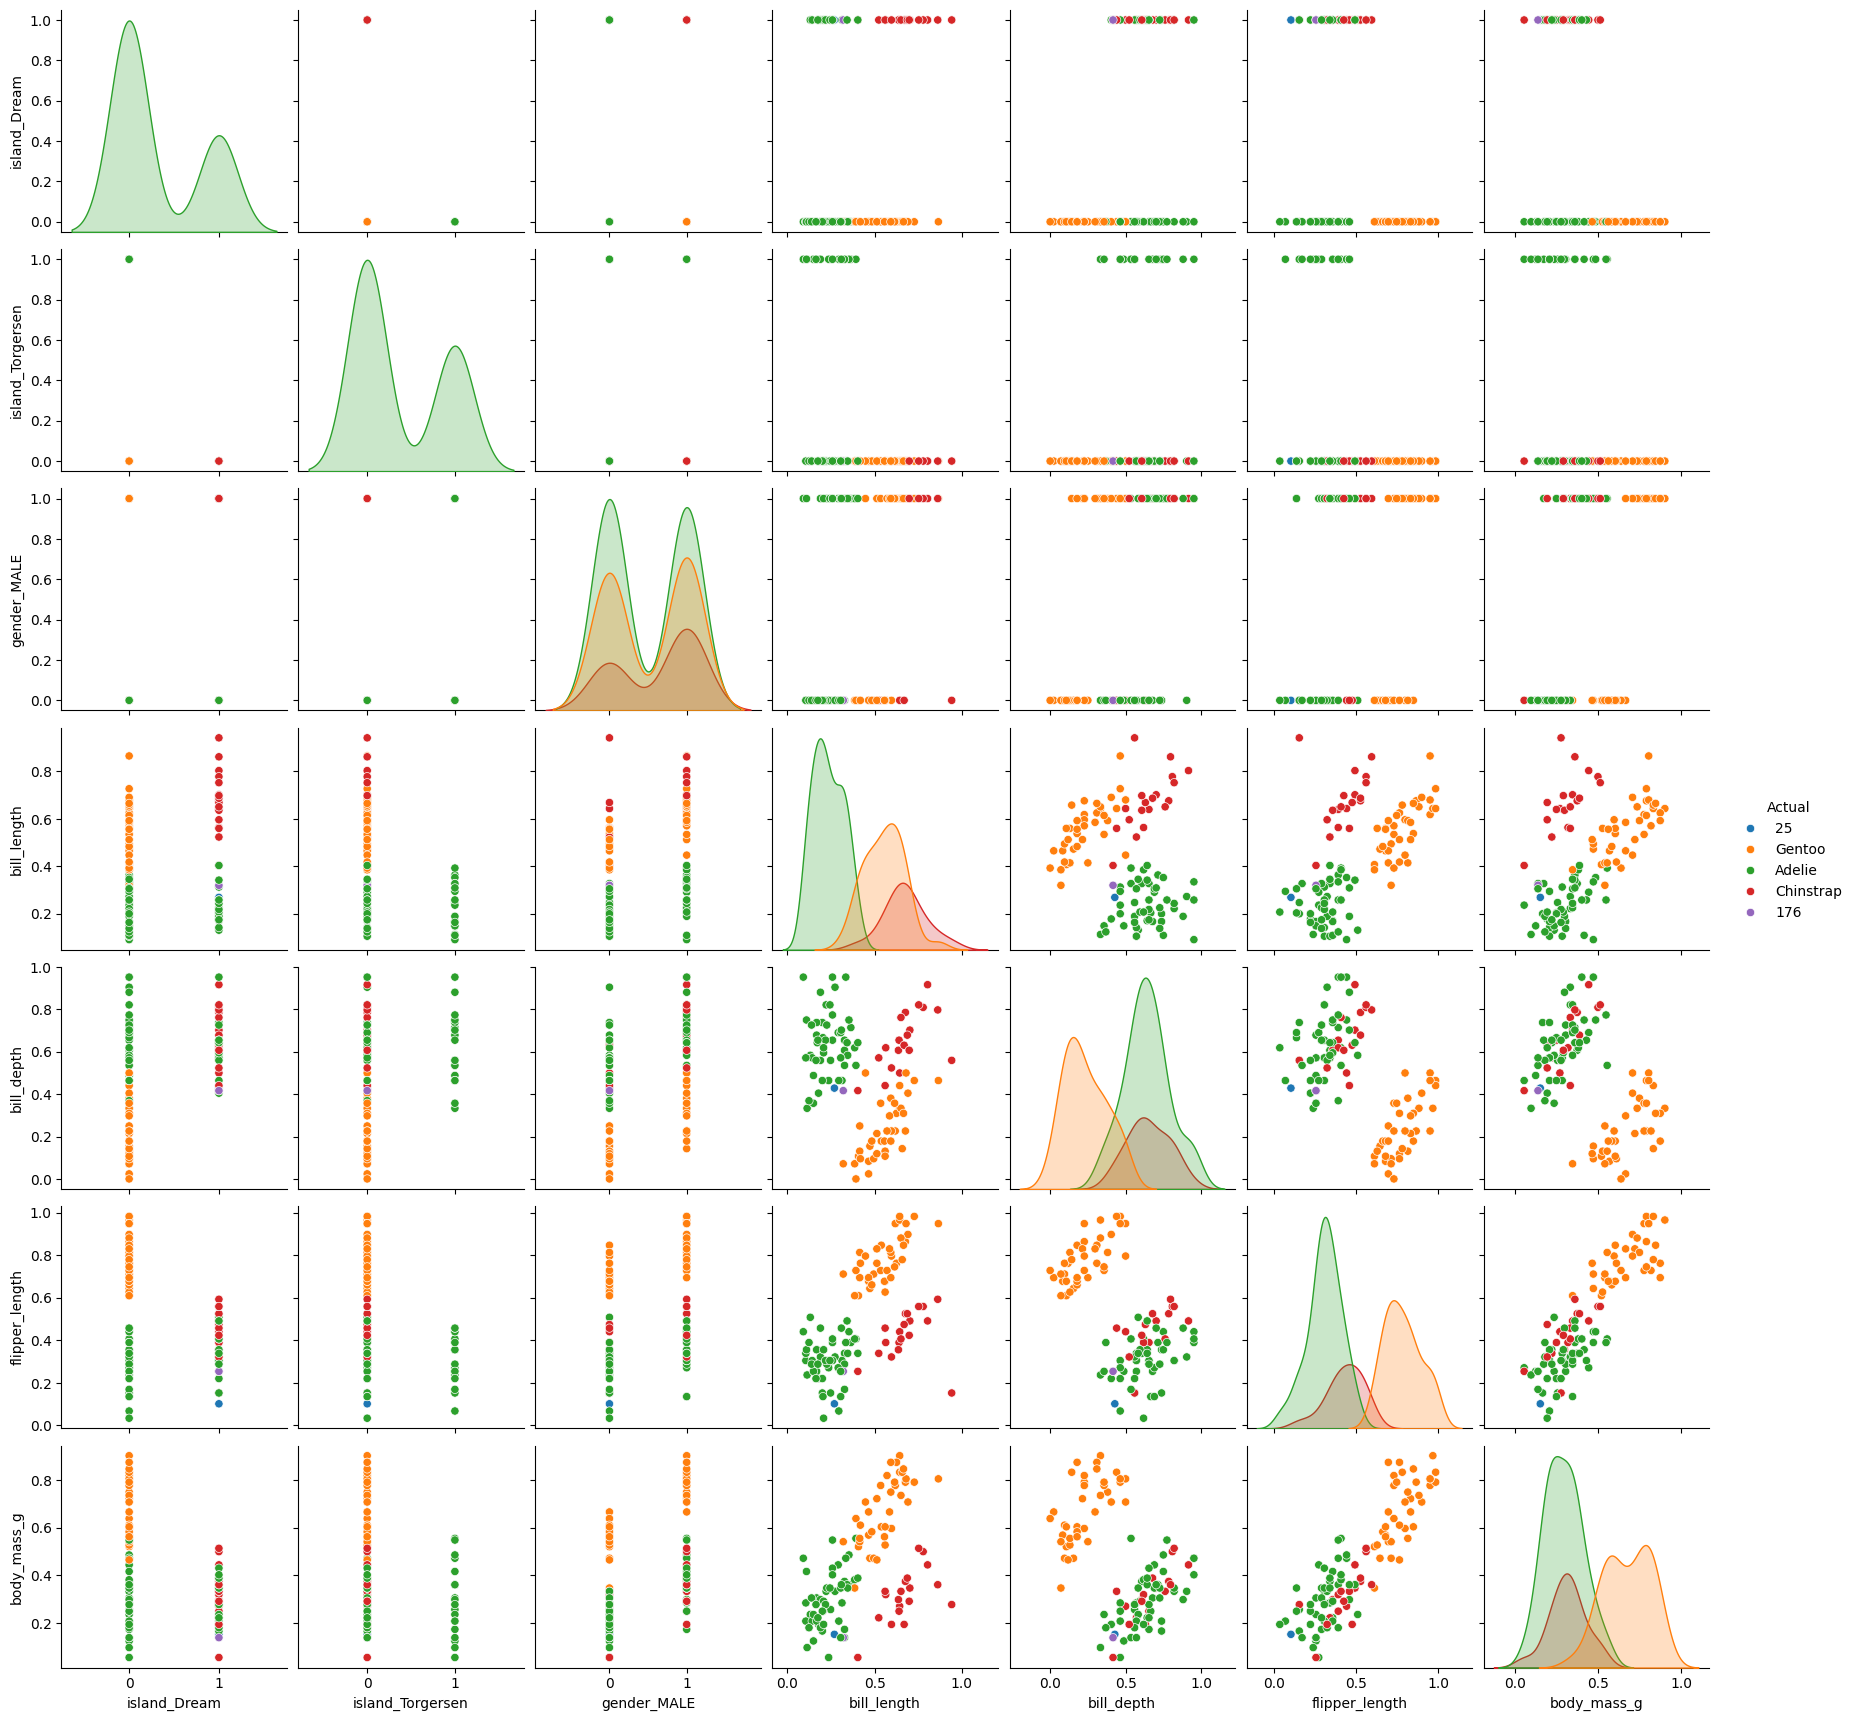

In [64]:
sns.pairplot(X_test, hue='Actual');